<a href="https://colab.research.google.com/github/DuongDuyThoai/bai-tap-AI/blob/main/nhandientien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [36]:
%cd /content/gdrive/MyDrive/Colab Notebooks/tien

/content/gdrive/MyDrive/Colab Notebooks/tien


In [37]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [38]:
training_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/tien/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 256 images belonging to 3 classes.


In [39]:
test_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/tien/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 30 images belonging to 3 classes.


In [40]:
training_set.class_indices

{'1K': 0, '2K': 1, '5K': 2}

In [42]:
test_set.class_indices

{'1K': 0, '2K': 1, '5K': 2}

In [44]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [47]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
8/8 [==============================] - 69s 8s/step - loss: 3.8085 - accuracy: 0.3320 - val_loss: 1.1457 - val_accuracy: 0.3333
Epoch 2/100
8/8 [==============================] - 5s 623ms/step - loss: 1.0491 - accuracy: 0.3906 - val_loss: 1.0162 - val_accuracy: 0.4333
Epoch 3/100
8/8 [==============================] - 6s 748ms/step - loss: 0.9510 - accuracy: 0.5117 - val_loss: 0.9108 - val_accuracy: 0.5333
Epoch 4/100
8/8 [==============================] - 7s 817ms/step - loss: 1.1506 - accuracy: 0.4648 - val_loss: 0.9840 - val_accuracy: 0.5000
Epoch 5/100
8/8 [==============================] - 5s 622ms/step - loss: 0.9077 - accuracy: 0.3984 - val_loss: 0.9276 - val_accuracy: 0.6000
Epoch 6/100
8/8 [==============================] - 5s 627ms/step - loss: 0.8240 - accuracy: 0.5977 - val_loss: 0.9086 - val_accuracy: 0.4667
Epoch 7/100
8/8 [==============================] - 5s 632ms/step - loss: 0.7137 - accuracy: 0.6250 - val_loss: 1.2647 - val_accuracy: 0.4667
Epoch 8/100
8/8

In [50]:
model.save('VNMONEY.h5')

In [52]:
model_tien = load_model('VNMONEY.h5')

In [54]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.15057134628295898
Train Accuracy 0.9453125


1/1 [==============================] - 0s 14ms/step
Đây là tờ: 5k


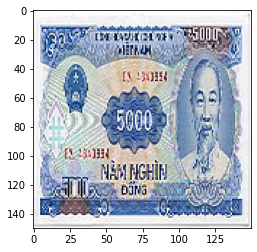

In [57]:
img = load_img('/content/test.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_tien.predict(img)
class_tien=['1k','2k','5k']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là tờ:", class_tien[a])